#### PGE 382 - Numerical Methods in Petroleum and Geosystems Engineering
#### Renato Poli - rep2656

#### CP2 - Feb, 7th

### Test setup

In [1]:
MAXX = 10
MAXT = 0.85

DX = 1 / 40
DT = 1 / 3600

import numpy as np
X = np.arange(0, 10 + DX, DX)
T = np.arange(0, 0.85 + DT, DT)
nx = len(X)
nt = len(T)

### a) Case 1

In [2]:
from math import factorial, pi, sin, ceil
import numpy as np
from numpy import exp, linspace, vectorize
import matplotlib.pyplot as plt

plt.style.use('paper.mplstyle')

# Set initial condition and BC@X=0
Uni = np.zeros( (nt, nx) )
Uni[0,:] = np.exp( - X )
Uni[:,0] = np.exp( T )

EXACT_Uni = np.zeros( (nt, nx) )
for n in np.arange( 0, nt ) :
    EXACT_Uni[n,:] = np.exp( T[n] - X )

for n in np.arange( 0, nt-1 ) :
    for i in np.arange( 1, nx ) :
        # Boundary condition @ i=N
        if i == nx-1 :
            UN = Uni[n,i-1] - 2*DX*Uni[n,i]  
        else :
            UN = Uni[n,i+1]

        Uni[n+1,i]  = Uni[n,i]\
                    - DT * Uni[n,i]\
                    - DT * ( UN - Uni[n,i-1] ) / ( 2*DX )\
                    + DT * ( UN - 2*Uni[n,i] + Uni[n,i-1] ) / ( DX*DX )
""

''

''

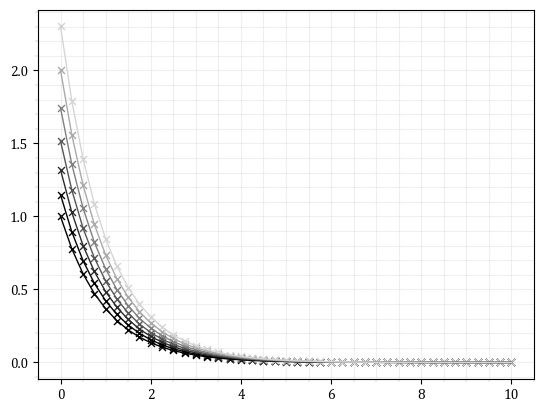

In [3]:
import matplotlib.pyplot as plt
import numpy as np

range = np.arange(nt-1)[::500]
colors = plt.get_cmap('gray', len(range))

i=0
for n in range :
    evr = 10
    c=colors(n/nt*.8)
    plt.plot( X[::evr], EXACT_Uni[n,::evr], color=c )
    plt.scatter( X[::evr], Uni[n,::evr], color=c, s=25, marker='x' )
""

#### Final Time

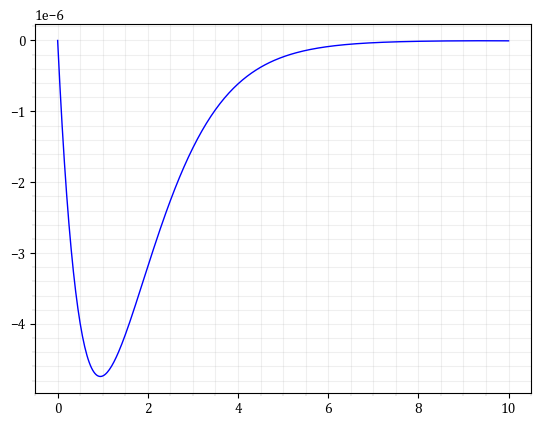

In [4]:
C1_LAST = Uni[-1,:]
C1_ERR = EXACT_Uni[-1,:] - Uni[-1,:]
plt.plot(X,C1_ERR)

\newpage
### b) Case 2

In [5]:
from math import factorial, pi, sin, ceil
import numpy as np
from numpy import exp, linspace, vectorize
import matplotlib.pyplot as plt

plt.style.use('paper.mplstyle')

# Set initial condition and BC@X=0
Uni = np.zeros( (nt, nx) )
Uni[0,:] = np.exp( - X )
Uni[:,0] = np.exp( T )

EXACT_Uni = np.zeros( (nt, nx) )
for n in np.arange( 0, nt ) :
    EXACT_Uni[n,:] = np.exp( T[n] - X )

for n in np.arange( 0, nt-1 ) :
    for i in np.arange( 1, nx ) :
        # Boundary condition @ i=N  -- UN: Uni[n,i+1]   UNb: Uni[n,i] (Backward)
        if i < nx-1 :
            UN = Uni[n,i+1] 
            UNb = Uni[n,i]
        else :
            UN = Uni[n,i-1] - 2*DX*Uni[n,i]  # (central diff)
            UNb = Uni[n-1,i] / ( 1 + DX )    # (backward diff)
        
        Uni[n+1,i]  = Uni[n,i] \
                    - DT * Uni[n,i] \
                    - DT * ( UNb - Uni[n-1,i-1] ) / DX \
                    + DT * ( UN - 2*Uni[n,i] + Uni[n,i-1] ) / ( DX*DX)
""

''

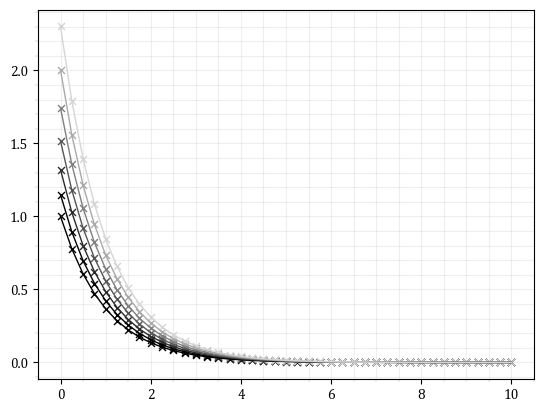

In [6]:
import matplotlib.pyplot as plt
import numpy as np

range = np.arange(nt-1)[::500]
colors = plt.get_cmap('gray', len(range))

i=0
for n in range :
    evr = 10
    c=colors(n/nt*.8)
    plt.plot( X[::evr], EXACT_Uni[n,::evr], color=c )
    plt.scatter( X[::evr], Uni[n,::evr], color=c, s=25, marker='x' )

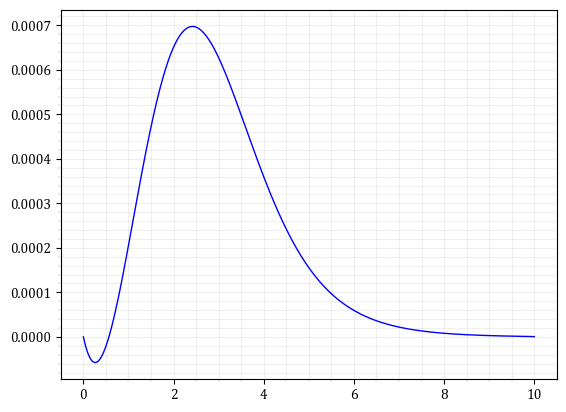

In [7]:
C2_LAST = Uni[-1,:]
C2_ERR = EXACT_Uni[-1,:] - Uni[-1,:]
plt.plot(X,C2_ERR)

#### Final time - Case 2

C1 Max err          C2 Max err          
4.74099e-06         6.97447e-04


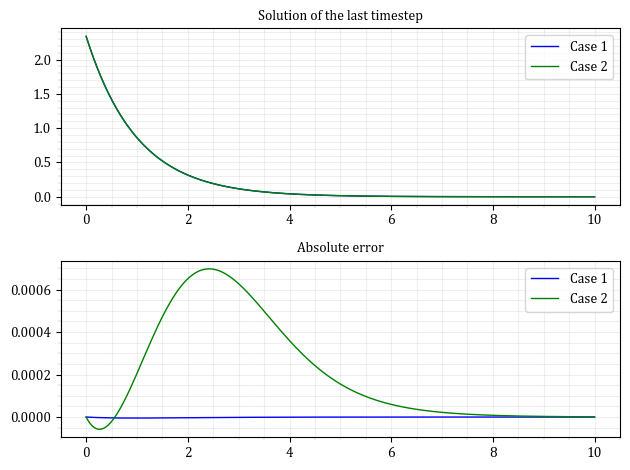

In [8]:
fig, [ax1,ax2] = plt.subplots(2,1)

ax1.set_title("Solution of the last timestep")
ax1.plot(X,C1_LAST, label='Case 1')
ax1.plot(X,C2_LAST, label='Case 2')
ax1.legend()

ax2.set_title("Absolute error")
ax2.plot(X,C1_ERR, label='Case 1')
ax2.plot(X,C2_ERR, label='Case 2')
ax2.legend()

fig.tight_layout()

C1_MAX = max(abs(C1_ERR))
C2_MAX = max(abs(C2_ERR))

print(f"{'C1 Max err':20s}{'C2 Max err':20s}")
print(50*"=")
print(f"{C1_MAX:10.5e}{C2_MAX:-20.5e}")
print(50*"=")